**Summary**: The complete Shakya et al. dataset and subsamples of this dataset (10%, 25%, and 50%) were trimmed at quality scores of 2 and 30 using trimmomatic and classified with sourmash gather.All sourmash signatures were calculated with --scaled values of 10000, k values of 21, 31 and 51, and abundance tracking. Classifiication was performed with both genbank and refseq databases created in may of 2017.

**Goals**:
- To determine how both conservative and aggresive quality trimming of reads affects classification results 
- To determine what fraction of the dataset is required to detect all these genomes

The data used in this notebook is  stored on the open science framework 
(https://osf.io/dm938/) and can be retrieved using the following command. 

```
for i in $(cat gather_output_names.txt)
do 
    osf -u <user_name> \
        -p dm938 \
        fetch osfstorage/taxonomic_classification/sourmash/${i} ${PWD}/${i} 
    echo ${i}
done
```
(gather_output_names.txt can be found [here](https://github.com/dahak-metagenomics/dahak/tree/master/workflows/taxonomic_classification))

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
import os
import glob


#### Merge all csvs into a single data frame named "all_files"
path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "*gather.output.csv")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files


df = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df = df.append(file_df)

#### Add a column titled "file_name" that contains the name of the file where the data came from 
    df['file_name'] = df['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
df

,intersect_bp,f_orig_query,f_match,f_unique_to_query,name,filename,md5,file_name
0,7420000,0.039353,0.994638,0.039353,BX119912.1 Rhodopirellula baltica SH 1 complet...,refseq-k51.sbt.json,0158c8fed04b7805bd8b6c9b1deb0457,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
1,5270000,0.027950,0.715061,0.027950,"BA000019.2 Nostoc sp. PCC 7120 DNA, complete g...",refseq-k51.sbt.json,65dee47a2f5d0719c93a0f14398574d4,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
2,4530000,0.024025,0.643466,0.024025,"CP000875.1 Herpetosiphon aurantiacus DSM 785, ...",refseq-k51.sbt.json,d5fb91a1945683fed1128ce3a59570eb,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
3,4350000,0.023071,0.782374,0.023071,"CP000909.1 Chloroflexus aurantiacus J-10-fl, c...",refseq-k51.sbt.json,8f4d200ad2557c0da2a57913c21c0354,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
4,4240000,0.022487,0.959276,0.022487,"AP009153.1 Gemmatimonas aurantiaca T-27 DNA, c...",refseq-k51.sbt.json,d39f70f284ac206dee2ee61b8a680a8b,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
5,4060000,0.021533,0.955294,0.021533,CP001472.1 Acidobacterium capsulatum ATCC 5119...,refseq-k51.sbt.json,25e2ad37d2f90d5d6ed8ec0521b7a059,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
6,4000000,0.021215,0.657895,0.021215,AE015928.1 Bacteroides thetaiotaomicron VPI-54...,refseq-k51.sbt.json,0b4c0b9a93b1998725462732d6b6a016,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
7,3840000,0.020366,0.962406,0.020366,CH959317.1 Sulfitobacter sp. NAS-14.1 scf_1099...,refseq-k51.sbt.json,4191f9193be96dbebba5ebaabc75dcf1,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
8,3770000,0.019995,0.956853,0.019995,"AE017180.2 Geobacter sulfurreducens PCA, compl...",refseq-k51.sbt.json,d1c43766838dfffdefe2cf17d0742d12,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...
9,3510000,0.018616,0.611498,0.018616,"CP000850.1 Salinispora arenicola CNS-205, comp...",refseq-k51.sbt.json,9429201e056e9e0f78ac9d9594289e82,SRR606249_subset10.trim2.scaled10k.k21_31_51.s...


In [4]:
ls

Hu_metaG_comparison.png
SRR606249.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv
SRR606249.trim2.scaled10k.k21_31_51.sig.k31.gather.output.csv
SRR606249.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv
SRR606249.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv
SRR606249.trim30.scaled10k.k21_31_51.sig.k31.gather.output.csv
SRR606249.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv
SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv
SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k31.gather.output.csv
SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv
SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv
SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31.gather.output.csv
SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv
SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv
SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31.gather.output.csv
SRR606249_subset25.trim2.scale

In [5]:
path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "SRR606249.trim2*")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files

df_trim2 = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df_trim2 = df_trim2.append(file_df)
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_trim2['file_name'] = df_trim2['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
#df_trim2

path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "SRR606249.trim30*")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files

df_trim30 = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df_trim30 = df_trim30.append(file_df)
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_trim30['file_name'] = df_trim30['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
#df_trim30
         
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_trim2['file_name'] = df_trim2['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
#df_trim2

path = r'/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash'                    
all_files = glob.glob(os.path.join(path, "SRR606249.trim*")) 
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')] 
all_files

df_complete = pd.DataFrame()
for file_ in all_files:
    try:
        file_df = pd.read_csv(file_)
    except:
        continue
    file_df = pd.read_csv(file_)
    file_df['file_name'] = file_
    df_complete = df_complete.append(file_df)
#### Add a column titled "file_name" that contains the name of the file where the data came from 
df_complete['file_name'] = df_complete['file_name'].map(lambda x: x.lstrip('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/taxonomic_classification/sourmash').rstrip('.gather.output.csv'))  
#df_complete

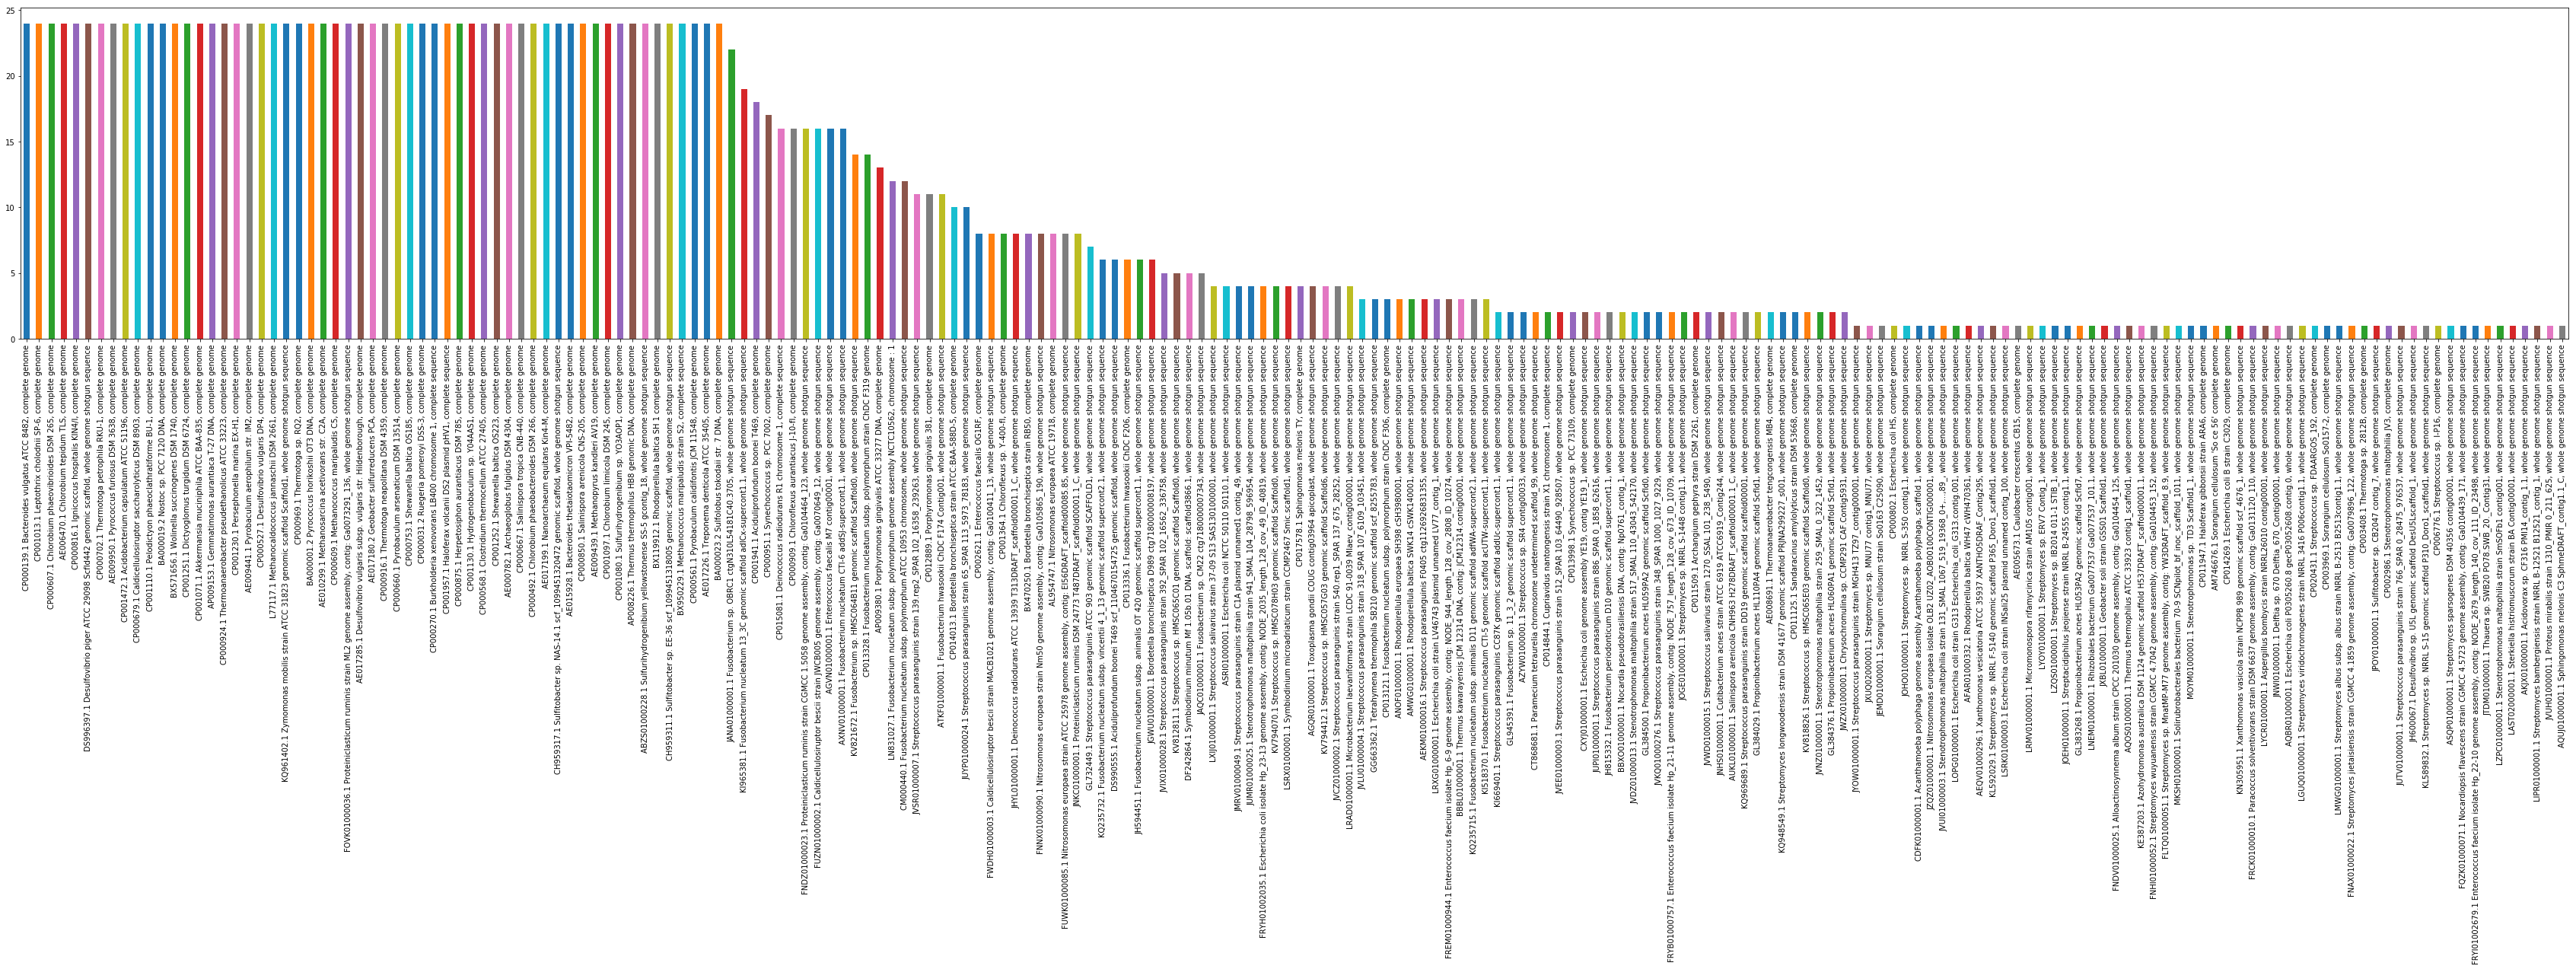

In [6]:
# Visual representation of all of the OTUs detected at in the complete and subsampled datasets,
# and k values of pof 
df['name'].value_counts().plot(kind="bar", figsize = (60,8))

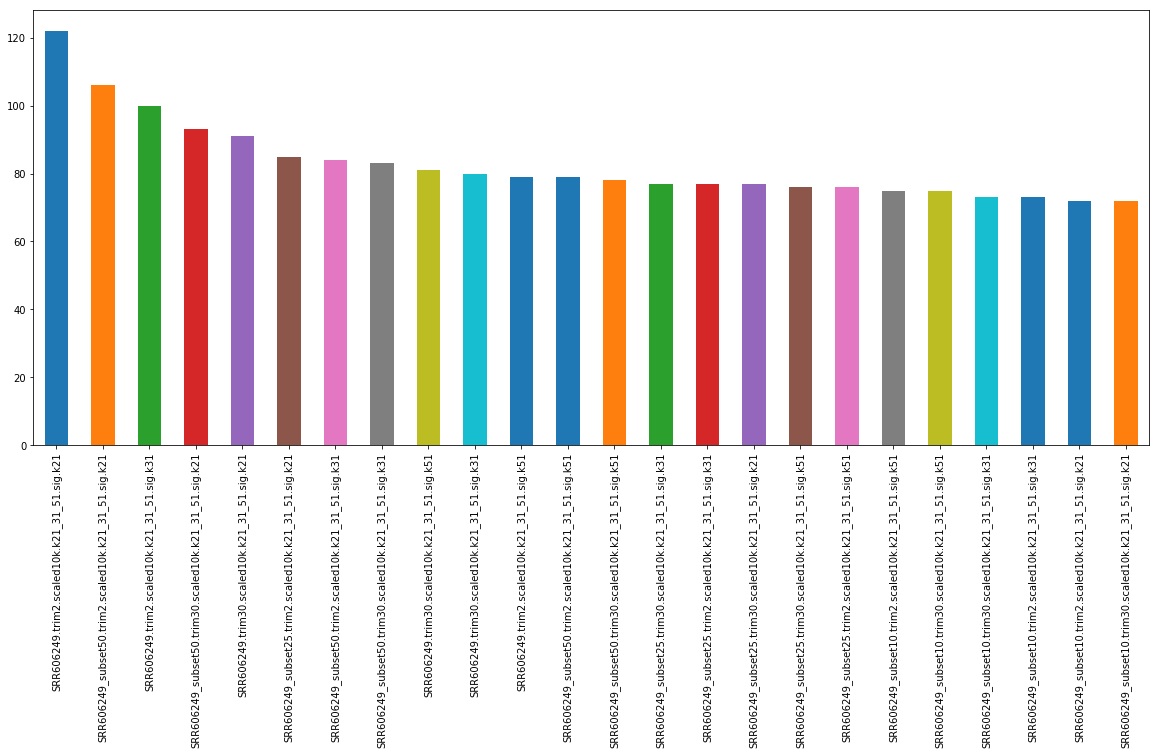

In [7]:
df['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

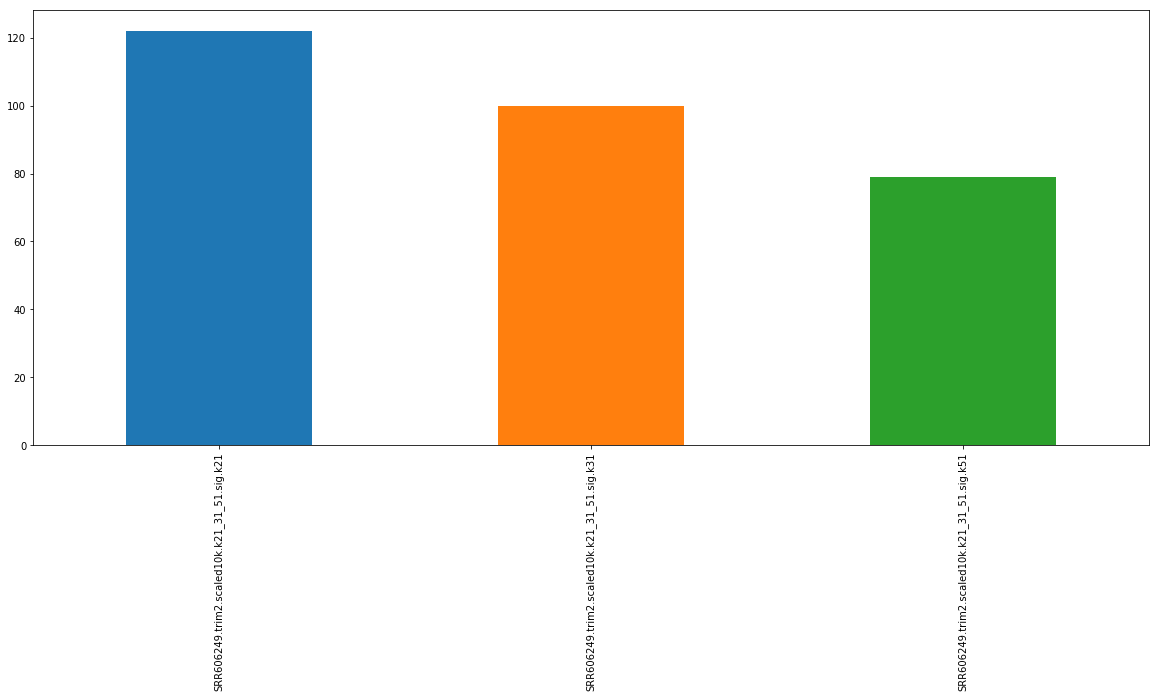

In [8]:
# Visual representation the number of unique OTUs with trimmed at a quality score or 2. 
df_trim2['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

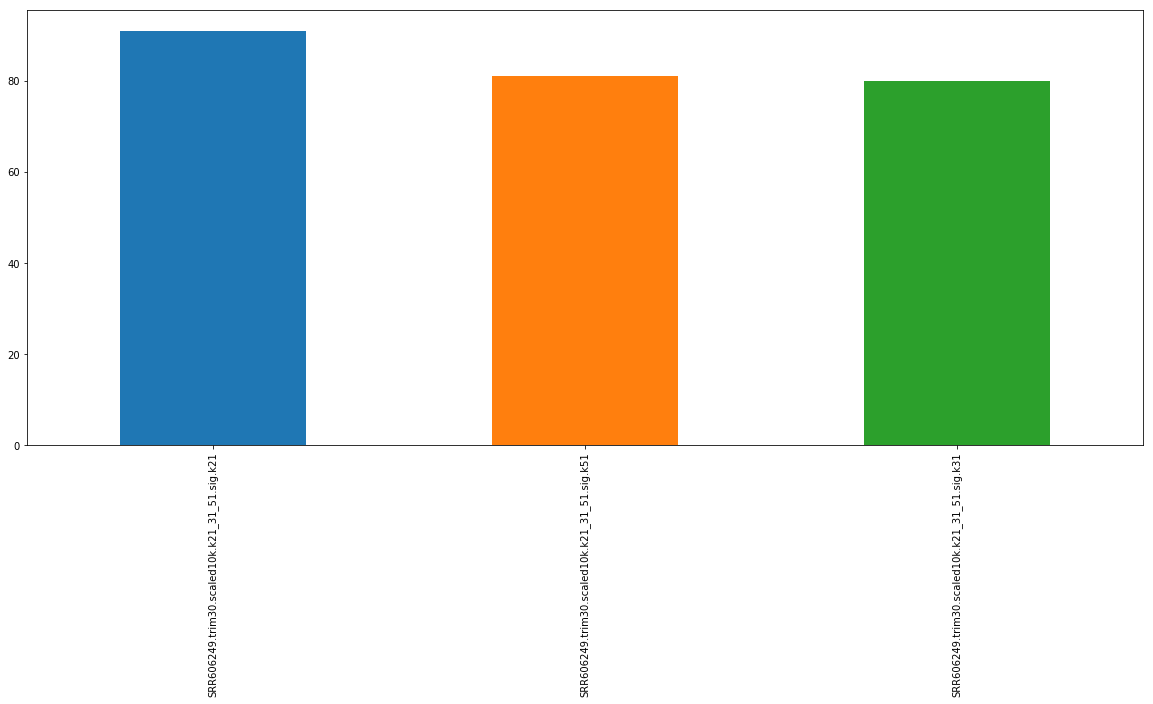

In [9]:
df_trim30['file_name'].value_counts().plot(kind="bar", figsize = (20,8))

In [10]:
# create new dataframe with name a file_name columns
new = df[['name', 'file_name']].copy()

#create empty dataframe 
results = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results['name'] = new['name']
for col in new['file_name'].unique():
    results[col] = ((col == new['file_name'])
    .astype(object)
    .replace(True, 1)
    .replace(False, 0))
results = results.groupby('name').agg(sum).reset_index()
results.to_csv('results.csv')

# Combined genus and species in a new column genus_species
# First, make new columns with the second(genus) and third(species) fields from 
# the column 'name" in dataframe 'new'
new['genus'] = new['name'].str.split(' ').str[1]
#new['species'] = new['name'].str.split(' ').str[2]
# Combined the columns 'genus' and 'species' with a space in between
#new["genus_species"] = new["genus"].map(str) +[" "] + new["species"]
#Write the new df to a csv named 'new2.csv'
new.to_csv('new2.csv')
# Print new
#new

In [11]:
#Create an empty dataframe 
results2 = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results2['genus'] = new['genus']
for col in new['file_name'].unique():
    results2[col] = ((col == new['file_name'])
    .astype(object)
    .replace(True, 1)
    .replace(False, 0))
results2 = results2.groupby('genus').agg(sum).reset_index()
results2.loc[results2["SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249.trim2.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249.trim30.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249.trim30.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249.trim2.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k51'] = 1
results2.loc[results2["SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249.trim2.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k31'] = 1
results2.loc[results2["SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21'] = 1
results2.loc[results2["SRR606249.trim30.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k51'] = 1

results2.to_csv('results2.csv')
#results2

In [22]:
df_complete_copy = df_complete[['name', 'file_name']].copy()
#create empty dataframe 
results = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results['name'] = df_complete_copy['name']
for col in df_complete_copy['file_name'].unique():
    results[col] = ((col == df_complete_copy['file_name'])
    .astype(object)
    .replace(True, 1)
    .replace(False, 0))
results = results.groupby('name').agg(sum).reset_index()
results.to_csv('results3.csv')

df_complete_copy['genus'] = df_complete_copy['name'].str.split(' ').str[1]

#Create an empty dataframe 
results_complete = pd.DataFrame()
# Put names from dataframe new column "name" in resutls column name 
results_complete['genus'] = df_complete_copy['genus']
for col in df_complete_copy['file_name'].unique():
    results_complete[col] = ((col == df_complete_copy['file_name'])
    .astype(object)
    .replace(True, 1)
    .replace(False, 0))
results_complete = results_complete.groupby('genus').agg(sum).reset_index()



results_complete.loc[results_complete["SRR606249.trim2.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k21'] = 1
results_complete.loc[results_complete["SRR606249.trim30.scaled10k.k21_31_51.sig.k21"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k21'] = 1
results_complete.loc[results_complete["SRR606249.trim30.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k31'] = 1
results_complete.loc[results_complete["SRR606249.trim2.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k51'] = 1
results_complete.loc[results_complete["SRR606249.trim2.scaled10k.k21_31_51.sig.k31"] > 0, 'SRR606249.trim2.scaled10k.k21_31_51.sig.k31'] = 1
results_complete.loc[results_complete["SRR606249.trim30.scaled10k.k21_31_51.sig.k51"] > 0, 'SRR606249.trim30.scaled10k.k21_31_51.sig.k51'] = 1

results_complete.to_csv('results3.csv')
results_complete

,genus,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,Acanthamoeba,1,0,0,0,0,0
1,Acidobacterium,1,1,1,1,1,1
2,Aciduliprofundum,1,1,1,1,1,1
3,Akkermansia,1,1,1,1,1,1
4,Alloactinosynnema,1,0,0,0,0,0
5,Archaeoglobus,1,1,1,1,1,1
6,Archangium,1,0,0,0,0,0
7,Aspergillus,1,0,0,0,0,0
8,Bacteroides,1,1,1,1,1,1
9,Bordetella,1,1,1,1,1,1


### Change kernel to R 

In [6]:
gather <- read.csv("results.csv", header = T, sep = ",")
#Print gather 
gather

X,name,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51,⋯,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,"ABZS01000228.1 Sulfurihydrogenibium yellowstonense SS-5 gcontig_18, whole genome shotgun sequence",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,"AE000782.1 Archaeoglobus fulgidus DSM 4304, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,"AE005673.1 Caulobacter crescentus CB15, complete genome",0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,"AE006470.1 Chlorobium tepidum TLS, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
4,"AE008691.1 Thermoanaerobacter tengcongensis MB4, complete genome",0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,"AE009439.1 Methanopyrus kandleri AV19, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
6,"AE009441.1 Pyrobaculum aerophilum str. IM2, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
7,"AE009950.1 Pyrococcus furiosus DSM 3638, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
8,"AE010299.1 Methanosarcina acetivorans str. C2A, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
9,"AE015928.1 Bacteroides thetaiotaomicron VPI-5482, complete genome",1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


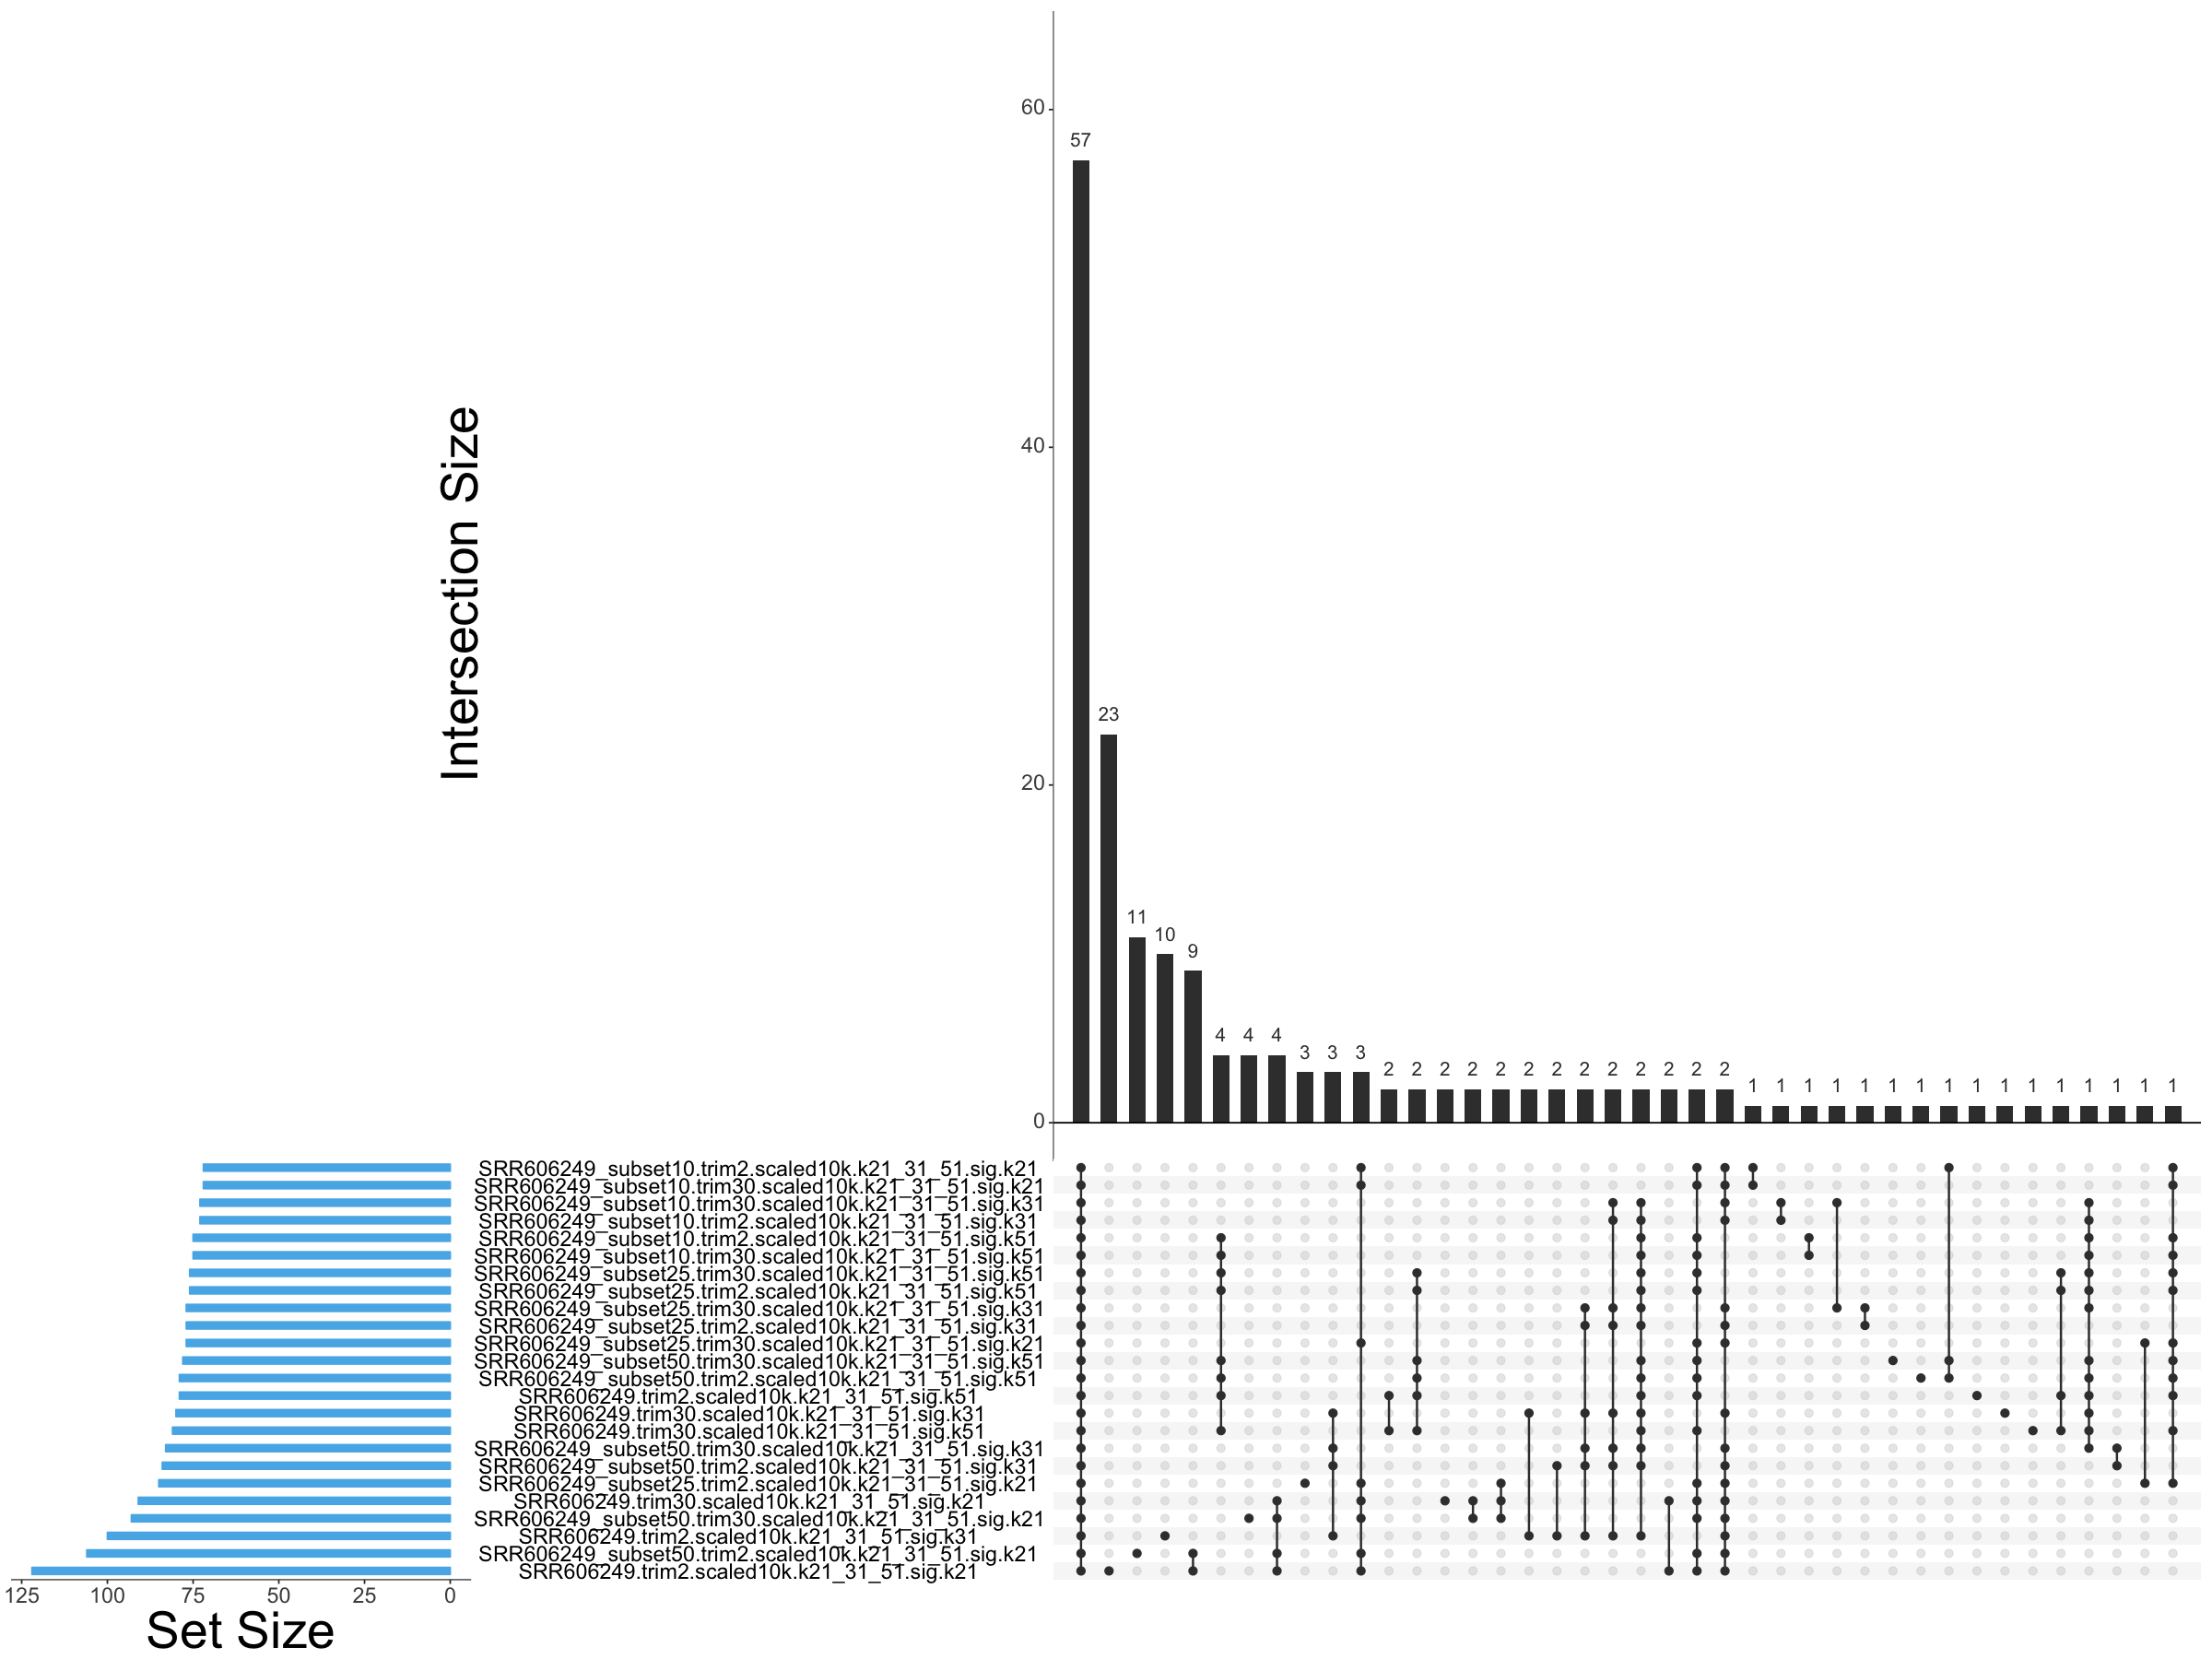

In [8]:
library(UpSetR)
#Change plot size to 20X20
options(repr.plot.width=20, repr.plot.height=15)
upset(gather, nsets = 24, sets.bar.color = "#56B4E9", order.by = "freq", 
      text.scale = c(4, 2, 4, 2, 2, 2))

In [2]:
gather2 <- read.csv("results2.csv", header = T, sep = ",")
#Print gather 2 
gather2

X,genus,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51,⋯,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,Acanthamoeba,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,Acidobacterium,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,Acidovorax,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
3,Aciduliprofundum,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
4,Akkermansia,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
5,Alloactinosynnema,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,Archaeoglobus,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
7,Archangium,0,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,0
8,Aspergillus,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,Azohydromonas,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


In [9]:
library(UpSetR)
#Change plot size to 20X20
options(repr.plot.width=10, repr.plot.height=5)
png("mygraph.png")
upset(gather2, nsets= 24, sets.bar.color = "#56B4E9", order.by = "freq", text.scale = c(1.3, 1.3, 1, 1, 2, 0.75))
dev.off()

pdf 
  2

In [4]:
gather3 <- read.csv("results3.csv", header = T, sep = ",")
#Print gather 
gather3

X,genus,SRR606249.trim2.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k21,SRR606249.trim30.scaled10k.k21_31_51.sig.k31,SRR606249.trim2.scaled10k.k21_31_51.sig.k51,SRR606249.trim2.scaled10k.k21_31_51.sig.k31,SRR606249.trim30.scaled10k.k21_31_51.sig.k51
0,Acanthamoeba,1,0,0,0,0,0
1,Acidobacterium,1,1,1,1,1,1
2,Aciduliprofundum,1,1,1,1,1,1
3,Akkermansia,1,1,1,1,1,1
4,Alloactinosynnema,1,0,0,0,0,0
5,Archaeoglobus,1,1,1,1,1,1
6,Archangium,1,0,0,0,0,0
7,Aspergillus,1,0,0,0,0,0
8,Bacteroides,1,1,1,1,1,1
9,Bordetella,1,1,1,1,1,1


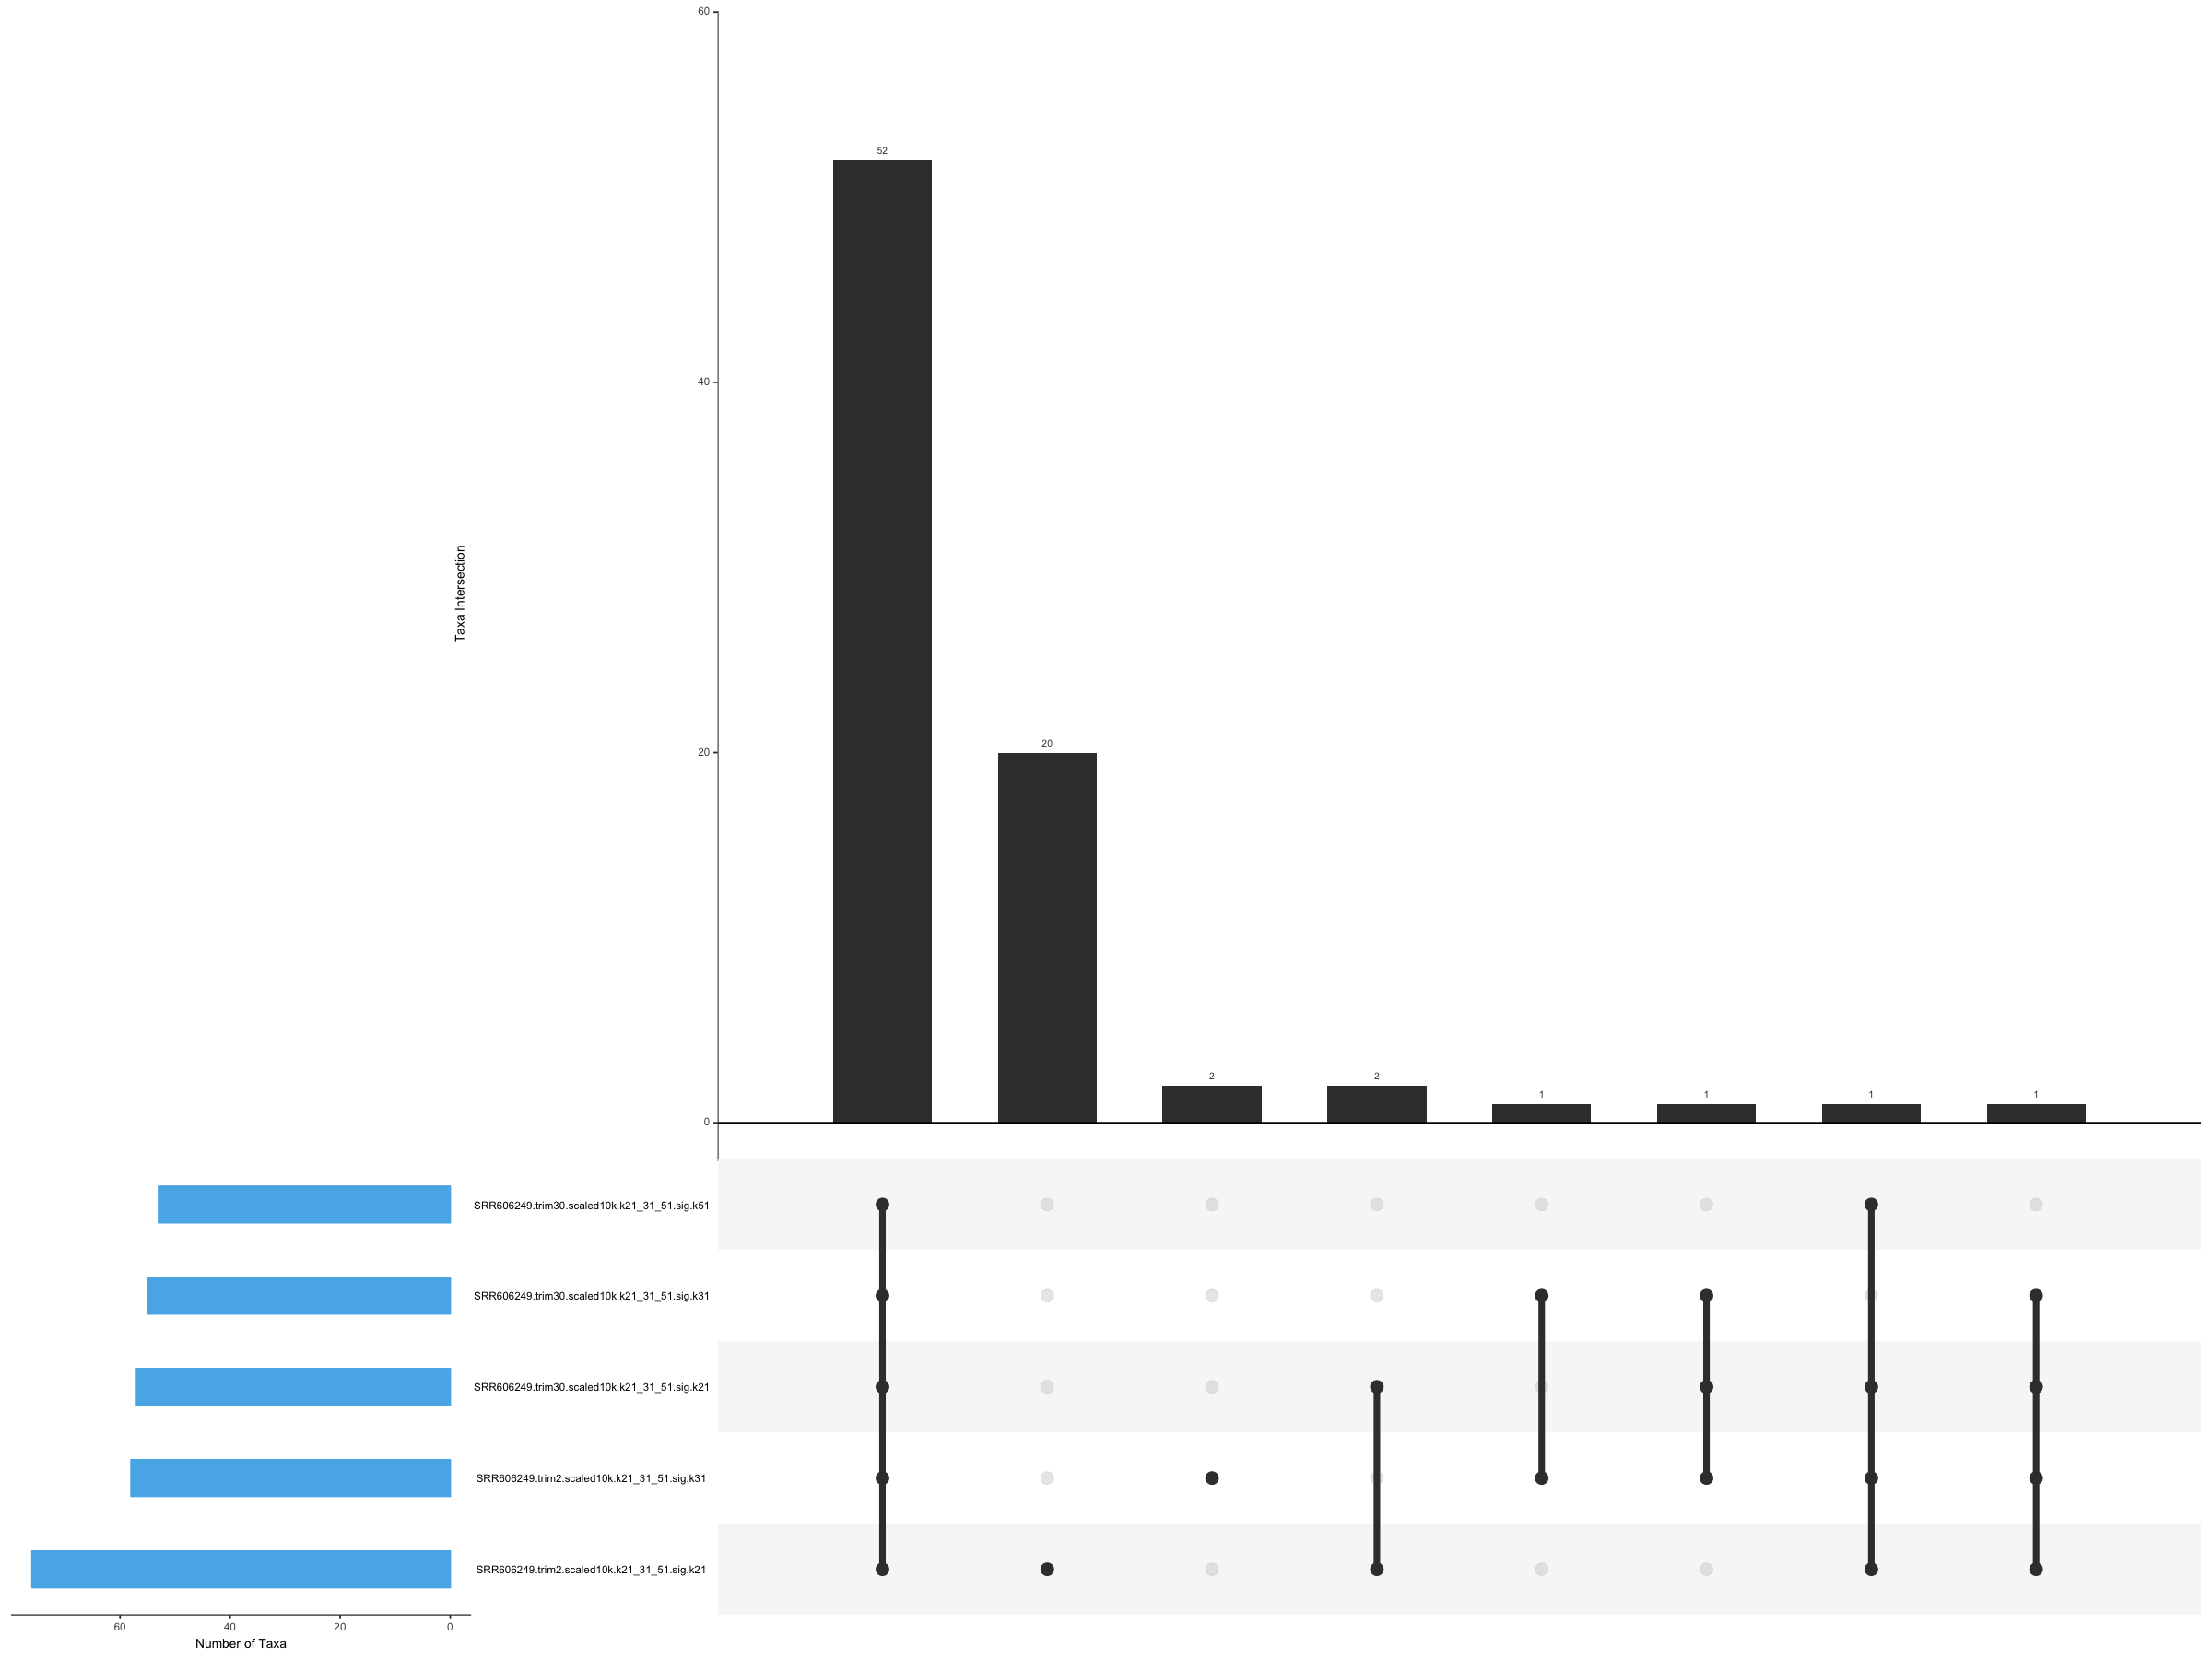

In [5]:
library(UpSetR)
#Change plot size to 20X20
options(repr.plot.width=20, repr.plot.height=15)
upset(gather3, ncol = sets.bar.color = "#56B4E9", order.by = "freq",  point.size = 3.5, line.size = 2, 
      mainbar.y.label = "Taxa Intersection", 
      sets.x.label = "Number of Taxa",)
      #text.scale = c(4, 2, 4, 2, 2, 4))